<a href="https://colab.research.google.com/github/mishra92/Data-Visualization/blob/main/Coffee_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install kagglehub


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("wardabilal/exploring-coffee-sales-with-eda-and-visualization")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'exploring-coffee-sales-with-eda-and-visualization' dataset.
Path to dataset files: /kaggle/input/exploring-coffee-sales-with-eda-and-visualization


In [5]:
import os

In [6]:
import pandas as pd

In [8]:
# Use the correct path obtained from kagglehub.dataset_download
dataset_path = path
display(os.listdir(dataset_path))

['Coffe_sales.csv']

In [9]:
file_path = os.path.join(dataset_path,
"Coffe_sales.csv")  # replace with real name
df = pd.read_csv(file_path)

In [10]:
### Exploring the Data

In [11]:
# Shape of data
print("Shape:", df.shape)

Shape: (3547, 11)


In [12]:
# Column names and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB
None


In [13]:
# Basic statistics
print(df.describe())

       hour_of_day        money  Weekdaysort    Monthsort
count  3547.000000  3547.000000  3547.000000  3547.000000
mean     14.185791    31.645216     3.845785     6.453905
std       4.234010     4.877754     1.971501     3.500754
min       6.000000    18.120000     1.000000     1.000000
25%      10.000000    27.920000     2.000000     3.000000
50%      14.000000    32.820000     4.000000     7.000000
75%      18.000000    35.760000     6.000000    10.000000
max      22.000000    38.700000     7.000000    12.000000


In [14]:
# Check for missing values
print(df.isnull().sum())

hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64


In [15]:
### Visualize

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


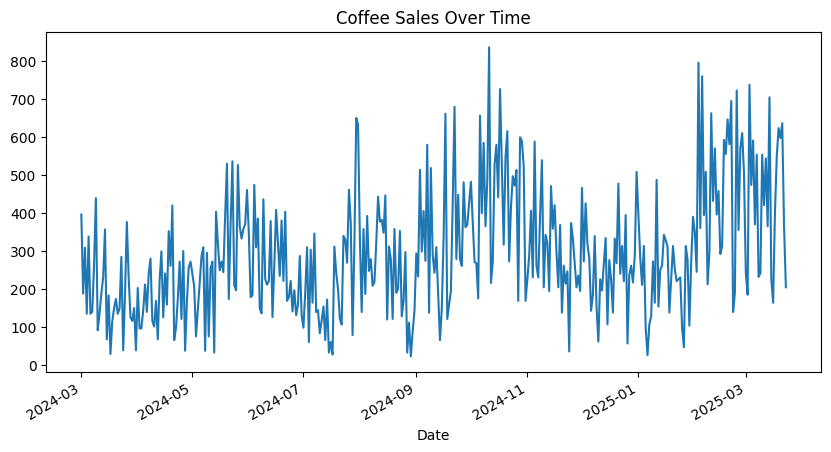

In [17]:
# Sales over time
df['Date'] = pd.to_datetime(df['Date'])  # if there's a Date column
df.groupby('Date')['money'].sum().plot(figsize=(10,5))
plt.title("Coffee Sales Over Time")
plt.show()

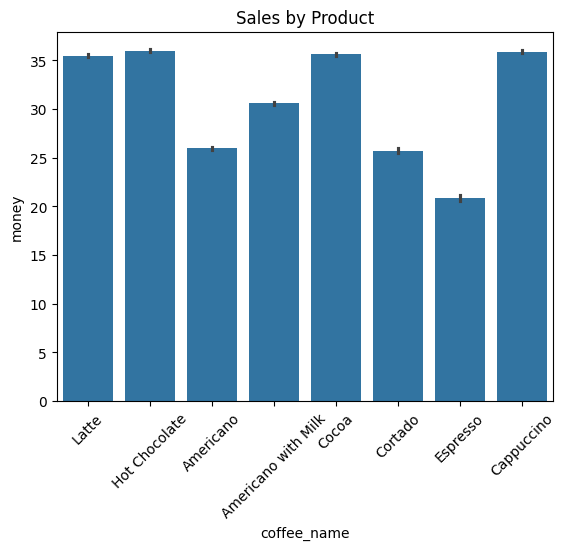

In [18]:
# Sales by product
sns.barplot(x="coffee_name", y="money", data=df)
plt.title("Sales by Product")
plt.xticks(rotation=45)
plt.show()

In [19]:
'''
Which coffee type sells the most?

Which region or country buys the most?

Is there seasonality in sales?

'''

'\nWhich coffee type sells the most?\n\nWhich region or country buys the most?\n\nIs there seasonality in sales?\n\n'

In [20]:
# Group by coffee type
coffee_sales = df.groupby("coffee_name")["money"].sum().sort_values(ascending=False)

**Total Sales**

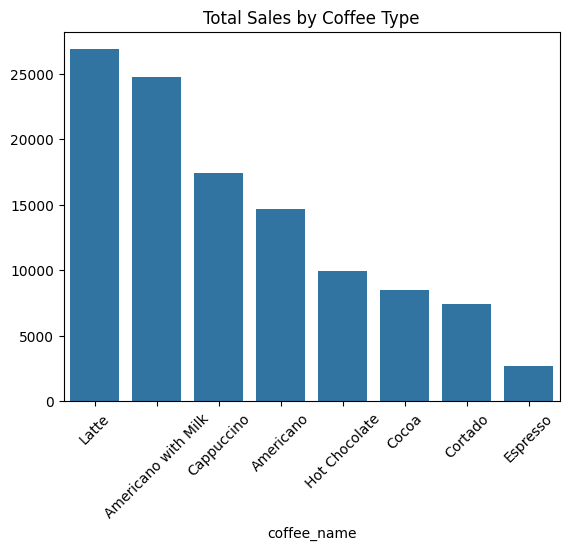

In [21]:
# Visualization
sns.barplot(x=coffee_sales.index, y=coffee_sales.values)
plt.title("Total Sales by Coffee Type")
plt.xticks(rotation=45)
plt.show()

**Coffee Sales Monthly**

Month
1      6398.86
2     13215.48
3     15891.64
4      5719.56
5      8164.42
6      7617.76
7      6915.94
8      7613.84
9      9988.64
10    13891.16
11     8590.54
12     8237.74
Name: money, dtype: float64


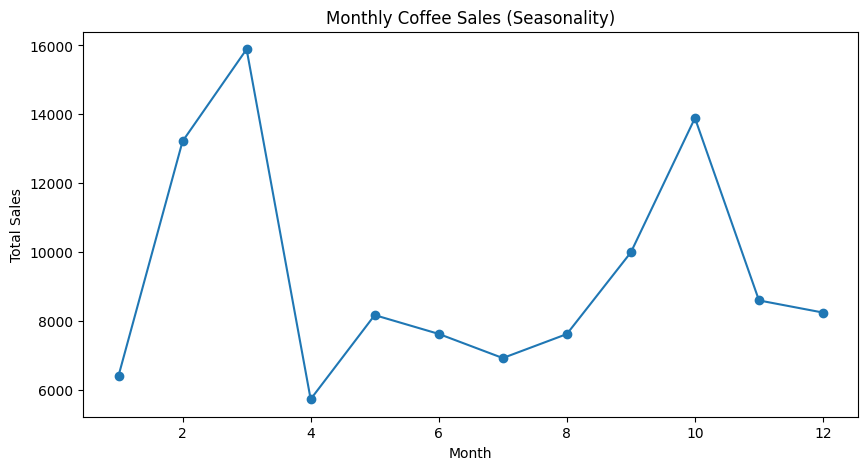

In [22]:
# Convert to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Group by month across years
monthly_sales = df.groupby("Month")["money"].sum()

print(monthly_sales)

# Visualization
monthly_sales.plot(kind="line", marker="o", figsize=(10,5))
plt.title("Monthly Coffee Sales (Seasonality)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

**Sales Overview**

1. What is the total sales and total quantity sold?
2. How has sales changed over time (daily, monthly, yearly)?
3. What are the top-selling coffee products overall?

In [27]:
### What is the total sales and total quantity sold?
total_sales = df['money'].sum()

print(f"Total Sales: ${total_sales:,.2f}")

Total Sales: $112,245.58


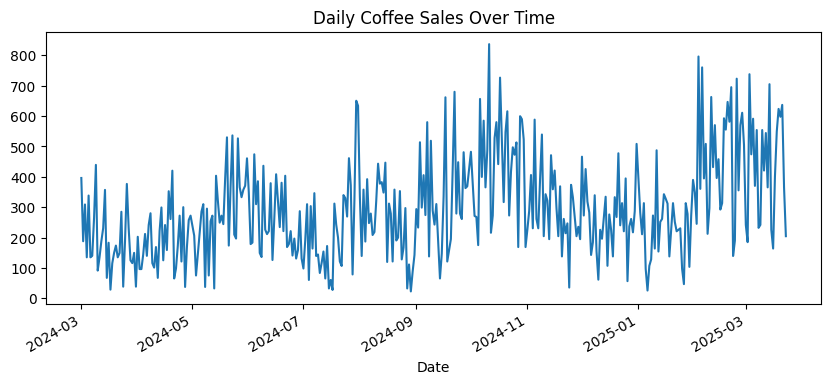

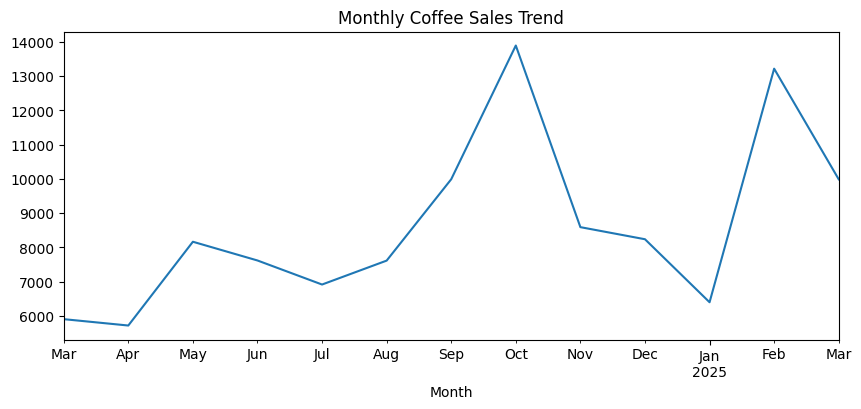

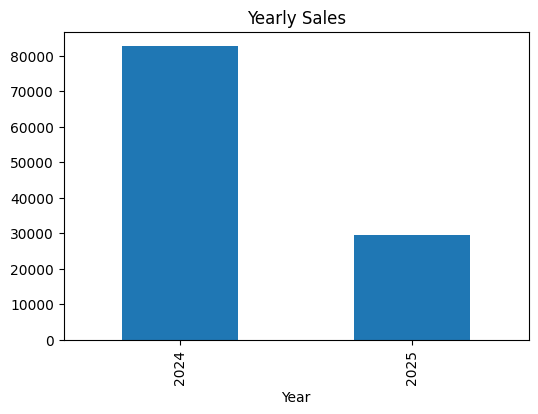

In [29]:
### How has sales changed over time (daily, monthly, yearly)?

#import matplotlib.pyplot as plt
#import pandas as pd

# Convert to datetime if needed
df['Date'] = pd.to_datetime(df['Date'])

# Daily sales
daily_sales = df.groupby('Date')['money'].sum()

plt.figure(figsize=(10,4))
daily_sales.plot(title="Daily Coffee Sales Over Time")
plt.show()

# Monthly sales
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['money'].sum()

plt.figure(figsize=(10,4))
monthly_sales.plot(title="Monthly Coffee Sales Trend")
plt.show()

# Yearly sales
df['Year'] = df['Date'].dt.year
yearly_sales = df.groupby('Year')['money'].sum()

plt.figure(figsize=(6,4))
yearly_sales.plot(kind='bar', title="Yearly Sales")
plt.show()


coffee_name
Latte                  26875.30
Americano with Milk    24751.12
Cappuccino             17439.14
Americano              14650.26
Hot Chocolate           9933.46
Name: money, dtype: float64


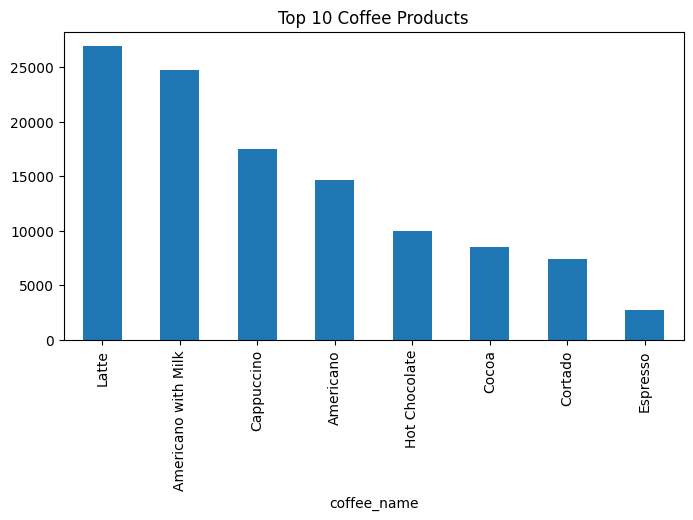

In [31]:
### What are the top-selling coffee products overall?

top_products = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False)
print(top_products.head())

top_products.head(10).plot(kind='bar', title='Top 10 Coffee Products', figsize=(8,4))
plt.show()


**Time/Seasonality Analysis**

1. Are there seasonal trends (e.g., higher sales in winter)?

2. What are the peak months or days of week for coffee sales?

3. Do certain coffee types sell better in certain months?

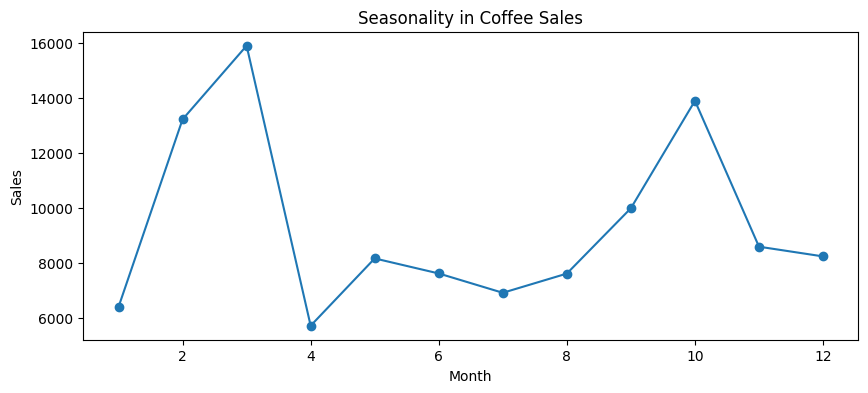

In [34]:
### Are There Seasonal Trends in Sales?

df['Month'] = df['Date'].dt.month

monthly_sales = df.groupby('Month')['money'].sum()
monthly_sales.plot(kind='line', marker='o', title='Seasonality in Coffee Sales', figsize=(10,4))
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()


Sales by Month:
 Date
March        15891.64
October      13891.16
February     13215.48
September     9988.64
November      8590.54
December      8237.74
May           8164.42
June          7617.76
August        7613.84
July          6915.94
January       6398.86
April         5719.56
Name: money, dtype: float64
Sales by Day of Week:
 DayOfWeek
Tuesday      18168.38
Monday       17363.10
Friday       16802.66
Thursday     16091.40
Wednesday    15750.46
Saturday     14733.52
Sunday       13336.06
Name: money, dtype: float64


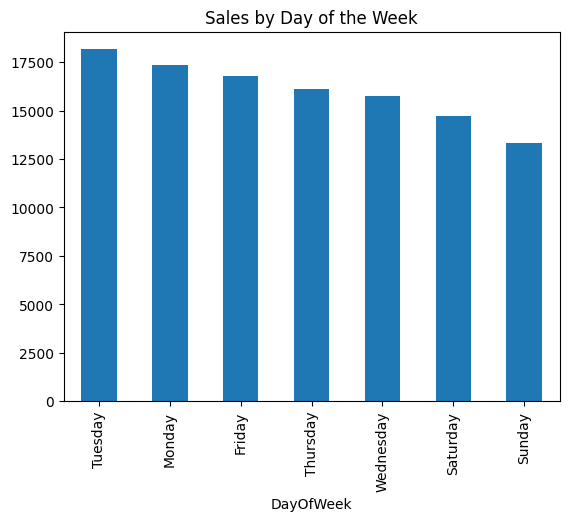

In [35]:
### What are the peak months or days of week for coffee sales?

df['DayOfWeek'] = df['Date'].dt.day_name()

# Peak months
peak_months = df.groupby(df['Date'].dt.month_name())['money'].sum().sort_values(ascending=False)
print("Sales by Month:\n", peak_months)

# Peak days
peak_days = df.groupby('DayOfWeek')['money'].sum().sort_values(ascending=False)
print("Sales by Day of Week:\n", peak_days)

peak_days.plot(kind='bar', title='Sales by Day of the Week')
plt.show()


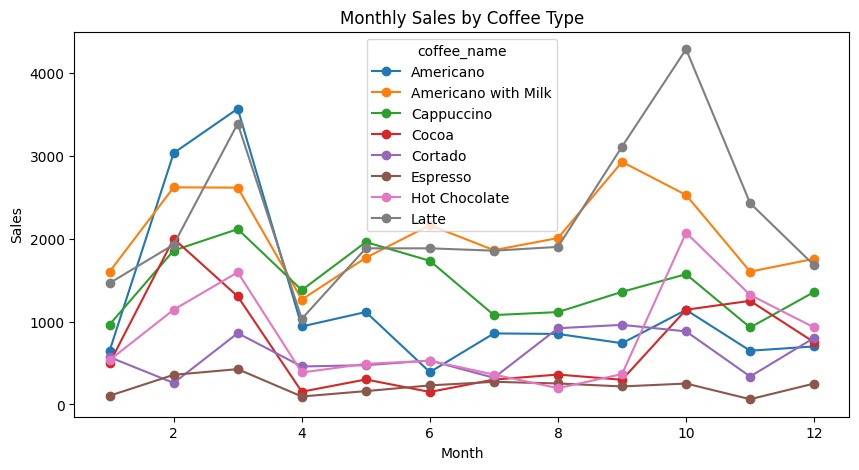

In [37]:
### Do certain coffee types sell better in certain months?

pivot = df.pivot_table(values='money', index='Month', columns='coffee_name', aggfunc='sum')
pivot.plot(kind='line', figsize=(10,5), marker='o')
plt.title('Monthly Sales by Coffee Type')
plt.ylabel('Sales')
plt.show()


**Profit & Performance**

1. Which coffee type gives the highest profit margin?

Total Sales by Time of Day:
Time_of_Day
Night        38186.34
Afternoon    38130.04
Morning      35929.20
Name: money, dtype: float64


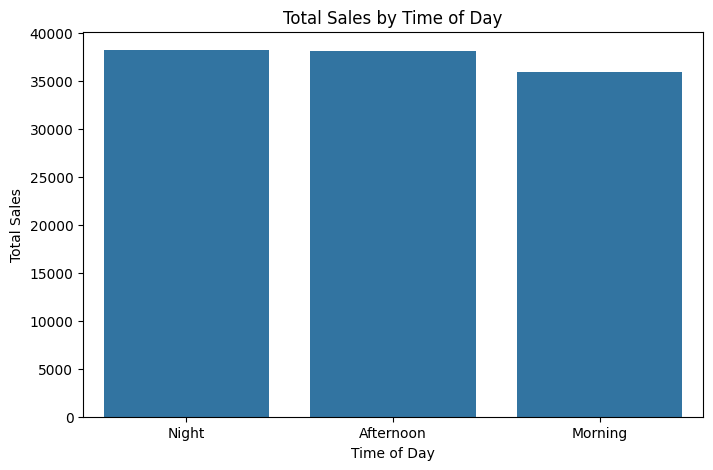

In [43]:
### Which coffee time gives the highest profit margin?

# Analyze sales trends by time of day
sales_by_time_of_day = df.groupby('Time_of_Day')['money'].sum().sort_values(ascending=False)

print("Total Sales by Time of Day:")
print(sales_by_time_of_day)

# Visualize sales by time of day
plt.figure(figsize=(8, 5))
sns.barplot(x=sales_by_time_of_day.index, y=sales_by_time_of_day.values)
plt.title('Total Sales by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Sales')
plt.show()